<a href="https://colab.research.google.com/github/Vannod/Simulacion-I/blob/main/P2/Integraci%C3%B3n_MC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integración MC

## Librerías

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Solución por simulación

In [24]:
# Función a integrar
def f(x):
    return np.sqrt(np.arctan(x))

# Límites de la integral la integral
a = 0
b = 1

# Número de muestras
n = 100000

# Método de la Media Muestral

x = np.random.uniform(a, b, n)  # Generar muestras aleatorias en el intervalo [a, b]
f_x = f(x)

integral = (b - a) * np.mean(f_x)  # Estimar la integral usando la media muestral

intervalo = stats.norm.interval(0.95, loc=np.mean(f_x), scale=np.std(f_x)/np.sqrt(n))  # Calcular el intervalo de confianza del 95%

# Método de Acierto y Error

y_max = 1  # Altura máxima del rectángulo

x_n = np.random.uniform(a, b, n)  # Generar muestras aleatorias en el intervalo [a, b]
y_n = np.random.uniform(0, y_max, n)  # Generar alturas aleatorias en el rango [0, y_max]

puntos = y_n < f(x_n)  # Verificar si los puntos están debajo de la curva
puntos_curva = np.sum(puntos)  # Contar los puntos que están debajo de la curva

# Estimar la integral usando el método de acierto y error
area = (b - a) * y_max
a_e = area * (puntos_curva / n)  # Probabilidad de que los puntos estén debajo de la curva

p = puntos_curva / n  # Probabilidad de que los puntos estén debajo de la curva
interval_ae = stats.norm.interval(0.95, loc=p, scale=np.sqrt(p * (1 - p) / n))  # Calcula el intervalo de confianza del 95%

# Comparación de los resultados
print("Método de la Media Muestral")
print("Estimación de la integral:", integral)
print("Intervalo de confianza (95%):", intervalo)

print("\nMétodo de Acierto y Error")
print("Estimación de la integral:", a_e)
print("Intervalo de confianza (95%):", interval_ae)

Método de la Media Muestral
Estimación de la integral: 0.6293506450712042
Intervalo de confianza (95%): (0.6280746348157913, 0.6306266553266171)

Método de Acierto y Error
Estimación de la integral: 0.62764
Intervalo de confianza (95%): (0.6246437026602035, 0.6306362973397964)


## Gráficos


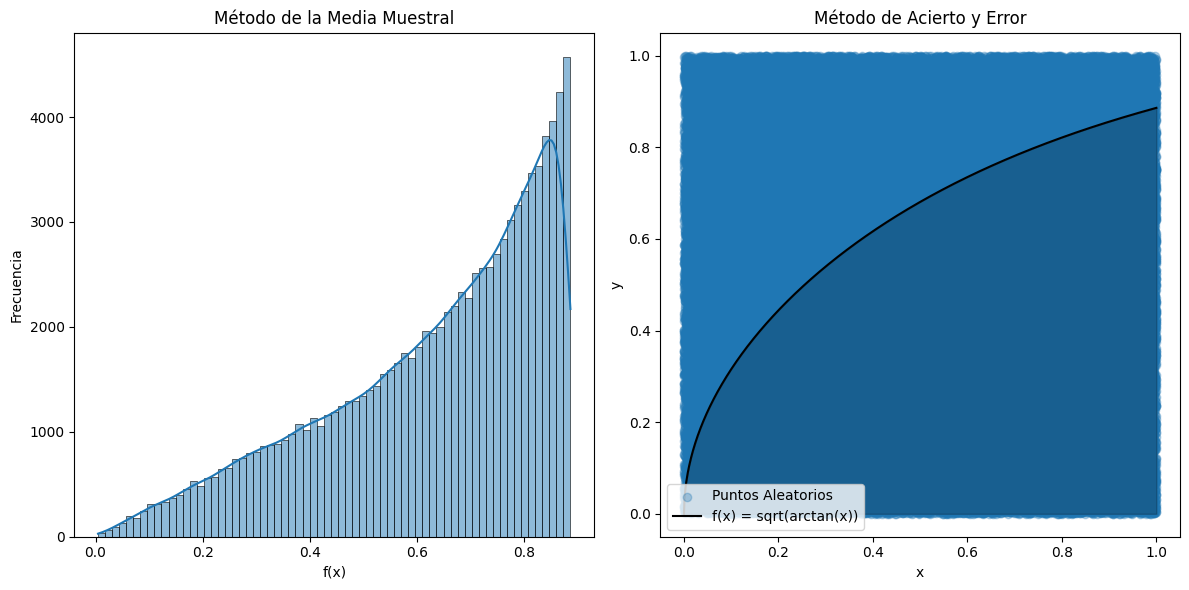

In [27]:
# Graficar las muestras y los puntos
plt.figure(figsize=(12, 6))

# Graficar las muestras para el método de la media muestral
plt.subplot(1, 2, 1)
sns.histplot(f_x, kde=True)
plt.title('Método de la Media Muestral')
plt.xlabel('f(x)')
plt.ylabel('Frecuencia')

# Graficar los puntos para el método de acierto y error
plt.subplot(1, 2, 2)
plt.scatter(x_n, y_n, alpha=0.3, label='Puntos Aleatorios')
plt.plot(np.linspace(a, b, 1000), f(np.linspace(a, b, 1000)), color='black', label='f(x) = sqrt(arctan(x))')
plt.fill_between(np.linspace(a, b, 1000), f(np.linspace(a, b, 1000)), alpha=0.2, color='black')
plt.title('Método de Acierto y Error')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

## Comentarios
---
El método de la media muestral nos da una estimación más precisa para  
$$
\int_0^1 \arctan(x) \, dx
$$

Esto se acerca al valor para $n=100,000$ (visto en el artículo) usando sumas de Riemann, que es 0.62982.

La media muestral, cuando el tamaño de $n$ es muy grande, converge a la media de la función, lo que nos lleva a una estimación mucho más precisa.

El método de acierto y error, aunque es un poco más sencillo, resulta ser menos eficiente. La proporción de puntos que caen debajo de la curva de la función puede variar más, teniendo así mayor varianza.

---